Q1-
Random Forest
 
Assignment


* About the data: 
* Let’s consider a Company dataset with around 10 variables and 400 records. 
* The attributes are as follows: 
*  Sales -- Unit sales (in thousands) at each location
*  Competitor Price -- Price charged by competitor at each location
*  Income -- Community income level (in thousands of dollars)
*  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
*  Population -- Population size in region (in thousands)
*  Price -- Price company charges for car seats at each site
*  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
*  Age -- Average age of the local population
*  Education -- Education level at each location
*  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
*  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
  The company dataset looks like this: 
 
* Problem Statement:
* A cloth manufacturing company is interested to know about the segment or attributes causes high    sale. 
* Approach - A Random Forest can be built with target variable Sales (we will first convert it in     categorical variable) & all other variable will be independent in the analysis.  


In [2]:
# IMPORT LIBRARIES 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [3]:
# UPLOAD DATA 

df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
# CONVERTING STRING TYPE COLUMNS DATA IN DIGIT FORM 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()        # label encoder we can not use for independent variable bcz this
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])  # as 0,1,2 but we can use onehotcoding
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [5]:
# DATA SIZE 
df.shape

(400, 11)

<AxesSubplot:ylabel='Frequency'>

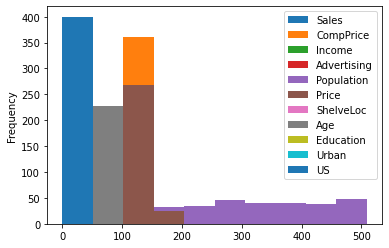

In [6]:
# DATA VISUALIZATION 
df.plot(kind='hist')

<AxesSubplot:>

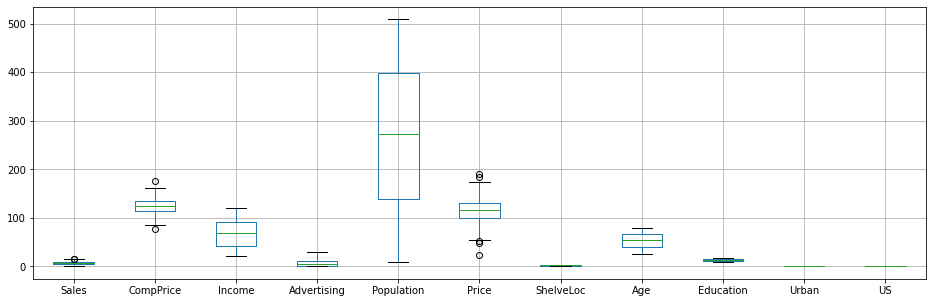

In [7]:
plt.figure(figsize=(16,5))
df.boxplot()


<AxesSubplot:>

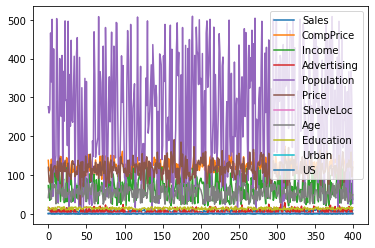

In [8]:
df.plot()

In [9]:
# SPLIT THE DATA IN INDEPENDENT AND DEPENDENT(TARGET) VARIABLE

x=df.iloc[:,1:]
y=df.iloc[:,0]

# Random forest regression

In [10]:
# train model for regession problem 
x, y= make_regression(n_features=3, n_informative=2,random_state=0, shuffle=False)
model = RandomForestRegressor(max_depth=3,n_estimators=100, random_state=0)
model.fit(x, y)

RandomForestRegressor(max_depth=3, random_state=0)

In [11]:
# model Accuracy 
model.score(x,y)

0.9370699173548432

***********************

**********************************

Q2-
* Use Random Forest to prepare a model on fraud data 
* treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [33]:
# UPLOAD DATA 

df11=pd.read_csv('Fraud_check.csv')
df11

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


<AxesSubplot:>

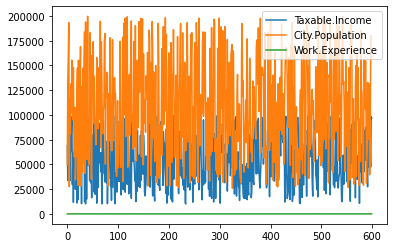

In [34]:
#  DATA VISUALIZATION
df11.plot()

<AxesSubplot:ylabel='Frequency'>

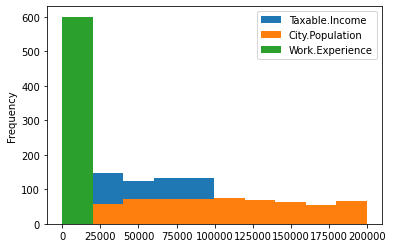

In [35]:
df11.plot(kind='hist')

<AxesSubplot:>

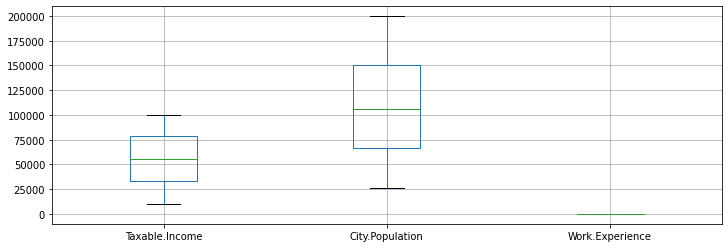

In [36]:
plt.figure(figsize=(12,4))
df11.boxplot()

In [37]:
# Rename columns names
df11.rename(columns={'Marital.Status':'Marital_Status',
                    'Taxable.Income':'Taxable_Income',
                'City.Population':'City_Population',
                    'Work.Experience':'Work_Experience'},inplace=True)

df11

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [38]:
# DIVIDED TEXABLE_iNCOME DATA IN TWO CATEGOIES ONE THAT IS TEXABLE_INCOME<=30000 THIS IS FRAUD 
# DATA AND TEXABLE_INCOME>30000 THIS IS VALID DATA 

df12=(df11['Taxable_Income']>30000)
df12                                   # True means valid data 


0      True
1      True
2      True
3      True
4      True
       ... 
595    True
596    True
597    True
598    True
599    True
Name: Taxable_Income, Length: 600, dtype: bool

In [39]:
df13=pd.DataFrame({'Taxable_Income_status':df12})
df13

,Taxable_Income_status
0,True
1,True
2,True
3,True
4,True
...,...
595,True
596,True
597,True
598,True


In [40]:
# CONCAT ORIGINAL DATA AND TEXABLE_INCOME STATUS
df14 = pd.concat([df11, df13], axis=1)
df14


,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_status
0,NO,Single,68833,50047,10,YES,True
1,YES,Divorced,33700,134075,18,YES,True
2,NO,Married,36925,160205,30,YES,True
3,YES,Single,50190,193264,15,YES,True
4,NO,Married,81002,27533,28,NO,True
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,True
596,YES,Divorced,69967,55369,2,YES,True
597,NO,Divorced,47334,154058,0,YES,True
598,YES,Married,98592,180083,17,NO,True


In [41]:
df15=df14.drop(['Taxable_Income'], axis=1)
df15

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_status
0,NO,Single,50047,10,YES,True
1,YES,Divorced,134075,18,YES,True
2,NO,Married,160205,30,YES,True
3,YES,Single,193264,15,YES,True
4,NO,Married,27533,28,NO,True
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,True
596,YES,Divorced,55369,2,YES,True
597,NO,Divorced,154058,0,YES,True
598,YES,Married,180083,17,NO,True


In [44]:
#  # CONVERTING STRING TYPE COLUMNS DATA IN DIGIT FORM 

from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()        # label encoder we can not use for independent variable bcz this
df15['Undergrad']= label_encoder1.fit_transform(df15['Undergrad'])  # as 0,1,2 but we can use onehotcoding
df15['Marital_Status']= label_encoder1.fit_transform(df15['Marital_Status'])
df15['Urban']           =  label_encoder1.fit_transform(df15['Urban'])
df15['Taxable_Income_status']= label_encoder1.fit_transform(df15['Taxable_Income_status'])

df15

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_status
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [57]:

df15['Taxable_Income_status'].value_counts()  # 476 are valid data , 124 are fake data

1    476
0    124
Name: Taxable_Income_status, dtype: int64

In [54]:
# SPLITING DATA INTO INDEPENDENT AND DEPENDENT(TARGET) VARAIABLE
y1=df15['Taxable_Income_status']
x1=df15.drop(['Taxable_Income_status'], axis=1)

# Random Forest Classification


In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import  RandomForestClassifier

# Random Forest Classification

num_trees1 = 50

model1 = RandomForestClassifier(n_estimators = num_trees1,
                               max_features = 2)

In [56]:
# MODEL ACCURACY 
kfold1 = KFold(n_splits = 5)

acc = cross_val_score(model1,x1, y1, cv = kfold1)
print(acc.mean())

0.7483333333333334
